# Final project - Maria Małecka 247067 MMDA
# *Maximum matching in bipartite graphs*

## Theoretical introduction

A bipartite graph consists of two disjoint sets of vertices X and
Y, such that every edge connects a vertex from X to a vertex from Y.

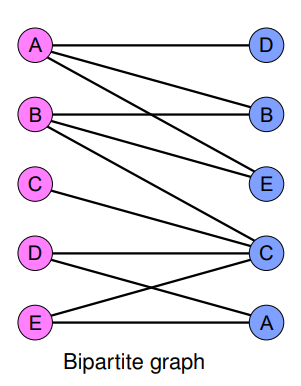

*Source: Lecture 8*

A matching in a bipartite graph is a set of edges with no shared vertices.

A maximum matching is the largest possible matching.



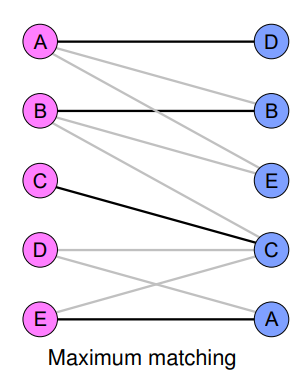

*Source: Lecture 8*

To find it, we use **augmenting paths**: paths starting at a free X vertex, alternating between unmatched and matched edges and ending at a free Y vertex.

Augmenting paths can be found efficiently using Breadth-First Search (BFS).
BFS starts from all unsaturated vertices in X and explores neighbors, layer by layer. It keeps track of reachable X vertices and visited Y vertices to build alternating paths.

Finding an augmenting path allows us to increase the size of the matching by **flipping the matched and unmatched edges along the path**. This is the core idea behind the Maximum Matching algorithm.


**Berge’s theorem** guarantees that a matching is maximum if and only if no augmenting path exists.




Once the maximum matching is found, we can compute the minimum vertex cover — the smallest set of vertices covering all edges.

By **Kőnig’s theorem**, in a bipartite graph, the size of the maximum matching equals the size of the minimum vertex cover.

Below algorithm finds the maximum matching in a bipartite graph by iteratively finding augmenting paths. It also returns the set Q, which corresponds to the Minimum Vertex Cover.

# Formal version of the code + examples

In [ ]:
from collections import deque

def maximum_matching(G, X, Y, M):
    """
    Implements the Maximum Matching procedure.

    Parameters
    G : dict {x: set of neighbors in Y} (adjacency list))
    X : set; left partition of the bipartite graph
    Y : set; right partition of the bipartite graph
    M : dict representing matching (both directions)

    Returns
    M — Updated (maximum matching)
    Q — Minimum vertex cover
    """

    # matched vertices in X
    def MX():
        return {x for x in X if x in M}

    # matched vertices in Y
    def MY():
        return {y for y in Y if y in M}

    # U contains all unsaturated (not matched) vertices from X
    U = X - MX() # starting points for BFS

    # MAIN LOOP- augmenting paths search;
    # It is repeated until no improvements are found (imp == 0):
    while True:

        # BFS INITIALIZATION
        S = set(U) # set of vertices in X that can be reach by alternating paths

        # T := ∅ # starts as empty and will grow as the BFS explores Y vertices.
        T = set() # set of vertices from Y that was already considered while building alternating paths.

        imp = 0 # improvement mark; indicates whether we found an augmenting path and should continue the process

        pred = {} # predecessor information for vertices in Y during BFS

        # queue := ∅
        queue = deque() #creates a double-ended queue in Python.
            #add elements at the end and remove elements from the front
            # keeps track of X vertices we need to explore

        # adding all unsaturated vertices in X to the queue to start BFS
        for u in U:
            queue.append(u)

        # BFS EXPLORATION
        while queue: # while queue not empty
            u = queue.popleft() # removes the first element from the queue and returns it
                                # gives the current vertex for exploration

            for v in G.get(u, set()) - T:  # explore neighbors in Y not yet visited

                if v in MY():       # if v is already matched
                    pred[v] = u     # store predecessor information; reached v from u
                    x = M[v]        # gives the vertex coming from X that v is currently matched to

                    # Add x and v to alternating sets
                    if x not in S:
                        queue.append(x) # add x to the BFS queue for further exploration
                        S.add(x) # mark x as reached by alternating paths
                        T.add(v) # mark v as visited in Y

                else:      # v not saturated
                    x = u  # start of the augmenting path (free X vertex from queue)
                    curr_v = v  # free Y vertex at the end of the path

                    while x in MX():    # while x is already matched
                        y = M[x]        # vertex from y that x is currently matched with

                        # Replace the old matched edge (x, y) with the new edge (x, curr_v)
                        M[x] = curr_v
                        M[curr_v] = x

                        curr_v = y    # the next vertex in Y along the path
                        x = pred[y]   # moving back to the X vertex that precedes y in the alternating path

                    # We connect the first free X vertex (x) to its Y neighbor (curr_v)
                    M[x] = curr_v
                    M[curr_v] = x

                    U.remove(x)   # Remove x from unsaturated set

                    # Mark improvement
                    imp = 1
                    break

            # restarting BFS with updated matching
            if imp == 1:
                break

        # The matching cannot be improved further → it is maximum
        if imp == 0:
            break

    Q = T | (X - S) # union of T and vertices from X not reachable by any alternating path

    return M, Q


In [ ]:
class Graph:
    def __init__(self, graph=None):
        if graph is None:
            graph = {}
        self.graph = graph

    def add_vertex(self, vertex):
        if vertex not in self.graph:
            self.graph[vertex] = []

    def add_edge(self, edge):
        u, v = edge
        if u == v:
            raise ValueError("Loops are not allowed!")
        self.add_vertex(u)
        self.add_vertex(v)
        if v not in self.graph[u]:
            self.graph[u].append(v)
        if u not in self.graph[v]:
            self.graph[v].append(u)

    def plot(self, directed=0):
        import networkx as nx
        import matplotlib.pyplot as plt
        if directed:
            G = nx.DiGraph(self.graph)
        else:
            G = nx.Graph(self.graph)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True)
        plt.show()

    def __str__(self):
        res = ""
        for v in self.graph:
            res += f"{v}: " + ", ".join(str(u) for u in self.graph[v]) + "\n"
        return res


## Usage

### Example with empty initial matching




Graph structure:
x1: y1, y2
y1: x1
y2: x1, x2, x3
x2: y2
x3: y2, y3
y3: x3, x4
x4: y3, y4
y4: x4



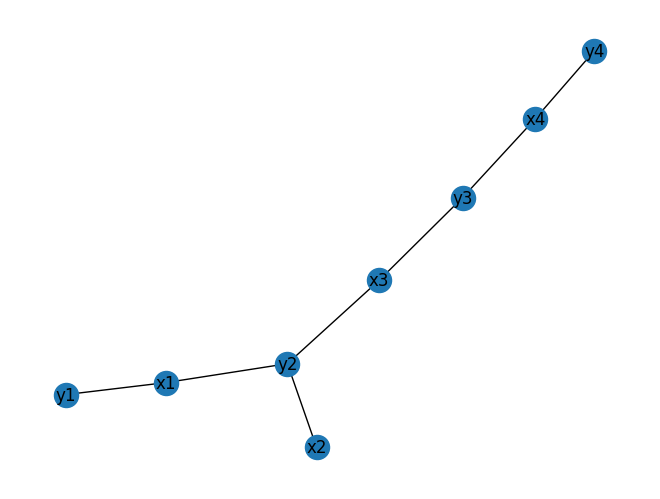

Maximum matching (X → Y): {'x1': 'y1', 'x3': 'y3', 'x2': 'y2', 'x4': 'y4'}
Size of the maximum matching: 4
Minimum vertex cover: {'x1', 'x3', 'x2', 'x4'}
Size of the minimum vertex cover: 4


In [ ]:
G_obj = Graph()

edges = [('x1', 'y1'), ('x1', 'y2'), ('x2', 'y2'),
         ('x3', 'y2'), ('x3', 'y3'), ('x4', 'y3'), ('x4', 'y4')]
for e in edges:
    G_obj.add_edge(e)

print("Graph structure:")
print(G_obj)

G_obj.plot()

G_dict = {k: set(v) for k, v in G_obj.graph.items()} # convertion from lists to sets
X = {'x1', 'x2', 'x3', 'x4'}
Y = {'y1', 'y2', 'y3', 'y4'}
M = {}

M, Q = maximum_matching(G_dict, X, Y, M)
matching_X_to_Y = {x: M[x] for x in X if x in M}

print("Maximum matching (X → Y):", matching_X_to_Y)
print("Size of the maximum matching:", len(matching_X_to_Y))
print("Minimum vertex cover:", Q)
print("Size of the minimum vertex cover:", len(Q))


### Example with not empty initial matching

Graph structure:
x1: y1, y2
y1: x1, x5
y2: x1, x2
x2: y2, y3
y3: x2, x3
x3: y3, y4
y4: x3, x4
x4: y4, y5
y5: x4, x5
x5: y1, y5



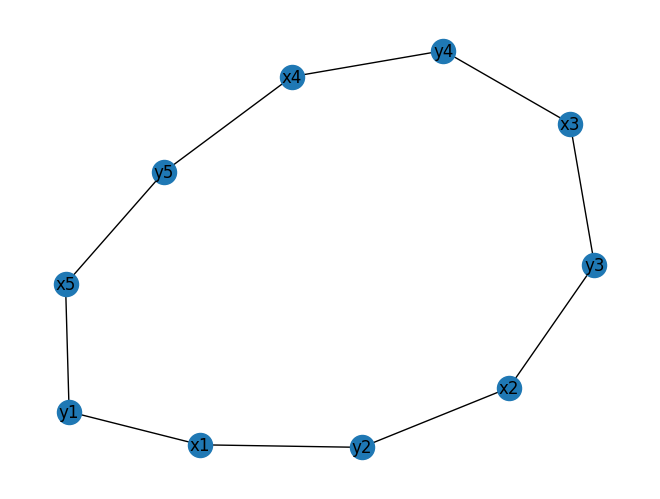

Initial matching: {'x1': 'y1', 'x2': 'y2'}
Size of the initial matching: 2
Maximum matching (X → Y): {'x5': 'y5', 'x1': 'y1', 'x3': 'y3', 'x2': 'y2', 'x4': 'y4'}
Size of the maximum matching: 5
Minimum vertex cover: {'x5', 'x1', 'x3', 'x2', 'x4'}
Size of the minimum vertex cover: 5


In [ ]:
G_obj = Graph()

edges = [
    ('x1', 'y1'), ('x1', 'y2'),
    ('x2', 'y2'), ('x2', 'y3'),
    ('x3', 'y3'), ('x3', 'y4'),
    ('x4', 'y4'), ('x4', 'y5'),
    ('x5', 'y1'), ('x5', 'y5')
]

for e in edges:
    G_obj.add_edge(e)

print("Graph structure:")
print(G_obj)

G_obj.plot()

X = {'x1', 'x2', 'x3', 'x4', 'x5'}
Y = {'y1', 'y2', 'y3', 'y4', 'y5'}
M = {
    'x1': 'y1', 'y1': 'x1',
    'x2': 'y2', 'y2': 'x2'
}

initial_matching = {x: M[x] for x in X if x in M}

print("Initial matching:", initial_matching)
print("Size of the initial matching:", len(initial_matching))

G_dict = {k: set(v) for k, v in G_obj.graph.items()}

M, Q = maximum_matching(G_dict, X, Y, M)

matching_X_to_Y = {x: M[x] for x in X if x in M} # showing just one direction

print("Maximum matching (X → Y):", matching_X_to_Y)
print("Size of the maximum matching:", len(matching_X_to_Y))
print("Minimum vertex cover:", Q)
print("Size of the minimum vertex cover:", len(Q))

# Demo code for presentation + example

In [ ]:
from collections import deque

def maximum_matching_demo(G, X, Y):
    """
    Demonstration version of the maximum matching algorithm.
    Prints step-by-step instructions how augmenting paths are found.
    """
    M = {}
    step = 1

    def MX():
        return {x for x in X if x in M}

    def MY():
        return {y for y in Y if y in M}

    U = X - MX()

    print("START")
    print("Free vertices in X:", U)
    print("-" * 40)

    # these will store the FINAL alternating sets
    final_S = set()
    final_T = set()

    while True:
        S = set(U)
        T = set()
        pred = {}
        queue = deque(U)
        improved = False

        print(f"\nStep {step}: BFS starting from free vertices in X")

        while queue:
            u = queue.popleft()
            print(f"  Exploring vertex {u}")

            for v in G.get(u, set()) - T:
                print(f"    Checking edge ({u}, {v})")

                if v in MY():
                    print(f"      {v} is matched → follow alternating path")
                    pred[v] = u
                    x = M[v]

                    if x not in S:
                        S.add(x)
                        T.add(v)
                        queue.append(x)

                else:
                    print(f"      {v} is FREE → augmenting path found!")

                    curr_v = v
                    x = u

                    while x in MX():
                        y = M[x]
                        M[x] = curr_v
                        M[curr_v] = x
                        curr_v = y
                        x = pred[y]

                    M[x] = curr_v
                    M[curr_v] = x
                    U.remove(x)

                    print("      Updated matching:", M)
                    improved = True
                    break

            if improved:
                break

        if not improved:
            print("\nNo more augmenting paths found.")
            final_S = S
            final_T = T
            break

        step += 1

        Q = final_T | (X - final_S)

    return M, Q



Graph structure:
x1: y1, y2
y1: x1, x2
y2: x1, x3
x2: y1
x3: y2, y3
y3: x3



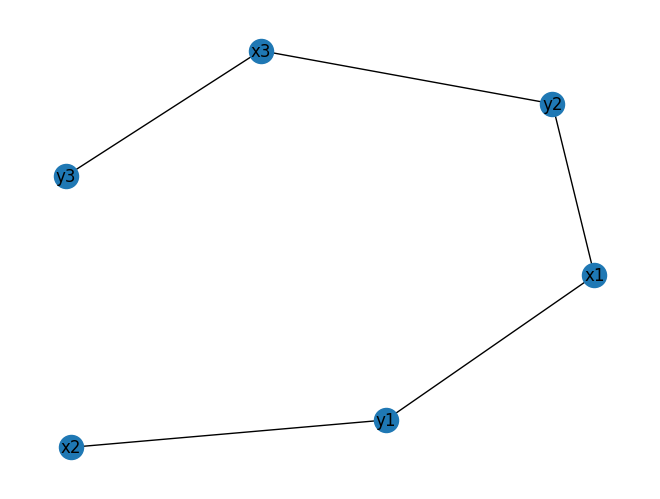

START
Free vertices in X: {'x1', 'x3', 'x2'}
----------------------------------------

Step 1: BFS starting from free vertices in X
  Exploring vertex x1
    Checking edge (x1, y1)
      y1 is FREE → augmenting path found!
      Updated matching: {'x1': 'y1', 'y1': 'x1'}

Step 2: BFS starting from free vertices in X
  Exploring vertex x3
    Checking edge (x3, y3)
      y3 is FREE → augmenting path found!
      Updated matching: {'x1': 'y1', 'y1': 'x1', 'x3': 'y3', 'y3': 'x3'}

Step 3: BFS starting from free vertices in X
  Exploring vertex x2
    Checking edge (x2, y1)
      y1 is matched → follow alternating path
  Exploring vertex x1
    Checking edge (x1, y2)
      y2 is FREE → augmenting path found!
      Updated matching: {'x1': 'y2', 'y1': 'x2', 'x3': 'y3', 'y3': 'x3', 'y2': 'x1', 'x2': 'y1'}

Step 4: BFS starting from free vertices in X

No more augmenting paths found.

Final matching (X → Y):
{'x1': 'y2', 'x3': 'y3', 'x2': 'y1'}
Size of maximum matching: 3
Minimum vertex cover

In [ ]:
G_obj = Graph()

edges = [
    ('x1', 'y1'),
    ('x1', 'y2'),
    ('x2', 'y1'),
    ('x3', 'y2'),
    ('x3', 'y3')
]

for e in edges:
    G_obj.add_edge(e)

print("Graph structure:")
print(G_obj)

G_obj.plot()

G_dict = {k: set(v) for k, v in G_obj.graph.items()}

X = {'x1', 'x2', 'x3'}
Y = {'y1', 'y2', 'y3'}


M_demo, Q_demo = maximum_matching_demo(G_dict, X, Y)

print("\nFinal matching (X → Y):")
print({x: M_demo[x] for x in X if x in M_demo})
print("Size of maximum matching:", len({x for x in X if x in M_demo}))

print("Minimum vertex cover:", Q_demo)
print("Size of minimum vertex cover:", len(Q_demo))

Graph structure:
x1: y1, y2
y1: x1, x2
y2: x1, x3
x2: y1, y3
y3: x2, x3, x4
x3: y2, y3, y4
y4: x3, x5
x4: y3, y5
y5: x4, x5
x5: y4, y5



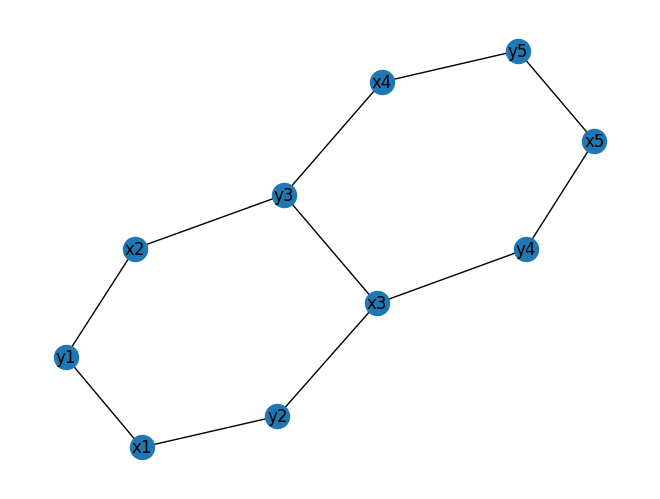

START
Free vertices in X: {'x5', 'x1', 'x3', 'x2', 'x4'}
----------------------------------------

Step 1: BFS starting from free vertices in X
  Exploring vertex x5
    Checking edge (x5, y4)
      y4 is FREE → augmenting path found!
      Updated matching: {'x5': 'y4', 'y4': 'x5'}

Step 2: BFS starting from free vertices in X
  Exploring vertex x1
    Checking edge (x1, y1)
      y1 is FREE → augmenting path found!
      Updated matching: {'x5': 'y4', 'y4': 'x5', 'x1': 'y1', 'y1': 'x1'}

Step 3: BFS starting from free vertices in X
  Exploring vertex x3
    Checking edge (x3, y4)
      y4 is matched → follow alternating path
    Checking edge (x3, y3)
      y3 is FREE → augmenting path found!
      Updated matching: {'x5': 'y4', 'y4': 'x5', 'x1': 'y1', 'y1': 'x1', 'x3': 'y3', 'y3': 'x3'}

Step 4: BFS starting from free vertices in X
  Exploring vertex x2
    Checking edge (x2, y1)
      y1 is matched → follow alternating path
    Checking edge (x2, y3)
      y3 is matched → follow al

In [ ]:
X = {'x1', 'x2', 'x3', 'x4', 'x5'}
Y = {'y1', 'y2', 'y3', 'y4', 'y5'}

edges = [
    ('x1', 'y1'), ('x1', 'y2'),
    ('x2', 'y1'), ('x2', 'y3'),
    ('x3', 'y2'), ('x3', 'y3'), ('x3', 'y4'),
    ('x4', 'y3'), ('x4', 'y5'),
    ('x5', 'y4'), ('x5', 'y5')
]

G_obj = Graph()

edges = [
    ('x1', 'y1'), ('x1', 'y2'),
    ('x2', 'y1'), ('x2', 'y3'),
    ('x3', 'y2'), ('x3', 'y3'), ('x3', 'y4'),
    ('x4', 'y3'), ('x4', 'y5'),
    ('x5', 'y4'), ('x5', 'y5')
]

for e in edges:
    G_obj.add_edge(e)

print("Graph structure:")
print(G_obj)

G_obj.plot()

G_dict = {k: set(v) for k, v in G_obj.graph.items()}

X = {'x1', 'x2', 'x3', 'x4', 'x5'}
Y = {'y1', 'y2', 'y3', 'y4', 'y5'}

M_demo, Q_demo = maximum_matching_demo(G_dict, X, Y)

print("\nFinal matching (X → Y):")
print({x: M_demo[x] for x in X if x in M_demo})
print("Size of maximum matching:", len({x for x in X if x in M_demo}))

print("Minimum vertex cover:", Q_demo)
print("Size of minimum vertex cover:", len(Q_demo))
